In [83]:
import pandas as pd
import numpy as np
from scipy import stats
import math

def foldChange(diseased, control):
    return diseased/control

def log2foldChange(foldChange):
    return math.log(foldChange, 2)

dat = pd.read_table('test2.txt', sep='\t')

controls = []
parkinsons = []
columns = list(dat)
for column in columns:
    if column.startswith('C_'):
        controls.append(column)
    elif column.startswith('P_'):
        parkinsons.append(column)

baseMean = []
contExpMeans = []
parExpMeans = []
foldChanges = []
log2foldChanges = []
contStdErrors = []
parStdErrors = []

for i in range(len(dat.index)):
    mean = np.mean(dat.ix[i,2:])
    contExpMean = np.mean(dat[controls].ix[i,:])
    parExpMean = np.mean(dat[parkinsons].ix[i,:])
    foldCh = foldChange(parExpMean, contExpMean)
    log2foldCh = log2foldChange(foldCh)
    contStdErr = stats.sem(dat[controls].ix[i,:])
    parStdErr = stats.sem(dat[parkinsons].ix[i,:])
    contStdErrors.append(contStdErr)
    parStdErrors.append(parStdErr)
    log2foldChanges.append(log2foldCh)
    foldChanges.append(foldCh)
    parExpMeans.append(parExpMean)
    contExpMeans.append(contExpMean)
    baseMean.append(mean)

    

out = {'EnsemblID':dat['EnsemblID'],
       'genes': dat['symbol'],
      'baseMean': baseMean,
      'contExpMean': contExpMeans,
      'parExpMean': parExpMeans,
      'foldCh': foldChanges,
      'log2fCh': log2foldChanges,
      'contSE': contStdErrors,
      'parSE': parStdErrors}

outDF = pd.DataFrame(out, columns=['EnsemblID', 'genes', 'baseMean', 'contExpMean', 'parExpMean', 'foldCh', 'log2fCh',
                                  'contSE', 'parSE'])
sortedOut = outDF.sort_values(by='foldCh', ascending=False)

sortedOut.to_csv('parkOut.txt', sep='\t')

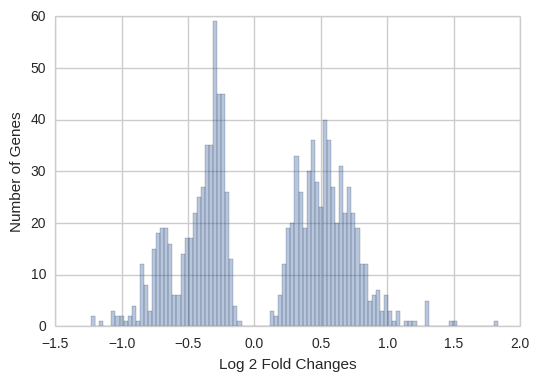

In [58]:
%matplotlib inline
import seaborn as sns
import pandas as pd

datPD = pd.read_table('parkinsonDE.txt')

lowPVal = datPD[datPD['padj'] < 0.05]
sns.set_style('whitegrid')

log2FCData = lowPVal['log2FoldChange']
log2FCPlot = sns.distplot(log2FCData, kde=False, bins=100)

log2FCPlot.set(xlabel='Log 2 Fold Changes', ylabel='Number of Genes')

#ax.set_xtickslabel([-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])

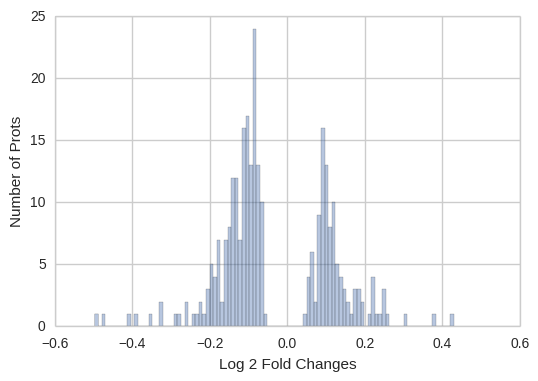

In [62]:
protDatPD = pd.read_table('protPDE.csv')

# print(protDatPD.head())

lowQVal = protDatPD[protDatPD['qvalue'] < 0.05]

#print(lowQVal)

log2FCPData = lowQVal['log2FoldChange']
log2FCPPlot = sns.distplot(log2FCPData, kde=False, bins=100)

log2FCPPlot.set(xlabel='Log 2 Fold Changes', ylabel='Number of Prots')


In [97]:
lowPVal['symbol'] = [symbol.upper() for symbol in lowPVal['symbol']]
lowQVal['Symbol'] = [symbol.upper() for symbol in lowQVal['Symbol']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [113]:
geneNames = list(lowPVal['symbol'])
protNames = list(lowQVal['Symbol'])

intersectGPs = []

for protName in protNames:
    if protName in geneNames:
        intersectGPs.append(protName)

print(intersectGPs)

['ACTA2', 'PRUNE2', 'ALDH1A1', 'SLC4A8', 'CRELD1', 'VAPB', 'GFM1', 'NDUFS1', 'MTX3', 'OPA1']


In [117]:
# for intersectGP in intersectGps:
#     lowPVal[['log2FoldChange']][lowPVal['symbol'] == intersectGP]

In [111]:
lowQVal[['log2FoldChange']][lowQVal['Symbol'] == 'ACTA2']

,log2FoldChange
10,0.106885
